# Forecast House Prices    

## Importing Libraries & Loading Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import math
from matplotlib.ticker import MaxNLocator
from fbprophet import Prophet

import squarify

from IPython.display import HTML
from subprocess import check_output

In [2]:
State_time_series=pd.read_csv("E:/Data Science/Experience/zillow price/State_time_series.csv",parse_dates=True)

## EDA

In [3]:
State_time_series.Date=pd.to_datetime(State_time_series.Date)
State_time_series['year'] = State_time_series.Date.dt.year

In [4]:
states = set(State_time_series[
    ~State_time_series['ZHVI_AllHomes'].isnull() &
    ~State_time_series['Sale_Prices'].isnull()
                      ]['RegionName'].values)

State_time_series_year = State_time_series[State_time_series['RegionName'].isin(states)].copy()
highest_cost_states = State_time_series_year[['RegionName', 'ZHVI_AllHomes']].groupby('RegionName').max().sort_values(by=['ZHVI_AllHomes'], ascending=False)[:5].index.values.tolist()
State_time_series_year=State_time_series_year[State_time_series_year.RegionName.isin(highest_cost_states)]
State_time_series_year.year = State_time_series_year.Date.dt.year

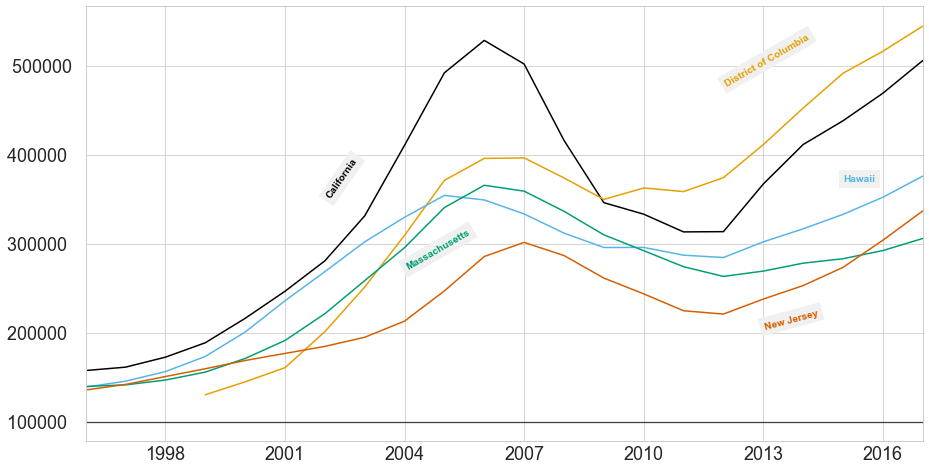

In [5]:
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255], 
          [213/255,94/255,0], [0,114/255,178/255]]

States_year_SalePrices=State_time_series_year.groupby([State_time_series_year.year,State_time_series_year.RegionName])['ZHVI_AllHomes'].mean().dropna().reset_index(name='SoldPrice')
fte_graph=States_year_SalePrices.pivot(index='year', columns='RegionName', values='SoldPrice').plot(figsize=(15,8), color=colors, legend=False)
fte_graph.figure.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.xlabel("")
fte_graph.set_yticklabels(labels = [-10, '100000   ', '200000   ',  '300000   ', '400000   ',  '500000  '])

fte_graph.axhline(y = 100000, color = 'black', linewidth = 1.3, alpha = .7)

fte_graph.set_xlim(left = 1996, right = 2017)

fte_graph.text(x = 2002, y = 390000, s = 'California', color = colors[0], weight = 'bold', rotation = 55,
              backgroundcolor = '#f0f0f0')
fte_graph.text(x = 2012, y = 530000, s = 'District of Columbia', color = colors[1], weight = 'bold', rotation = 30,
              backgroundcolor = '#f0f0f0')
fte_graph.text(x = 2015, y = 370000, s = 'Hawaii', color = colors[2], weight = 'bold', rotation = 0, 
               backgroundcolor = '#f0f0f0')
fte_graph.text(x = 2004, y = 310000, s = 'Massachusetts', color = colors[3], weight = 'bold', rotation = 30,
              backgroundcolor = '#f0f0f0')
fte_graph.text(x = 2013, y = 220000, s = 'New Jersey', color = colors[4], weight = 'bold',  rotation = 15,
              backgroundcolor = '#f0f0f0');

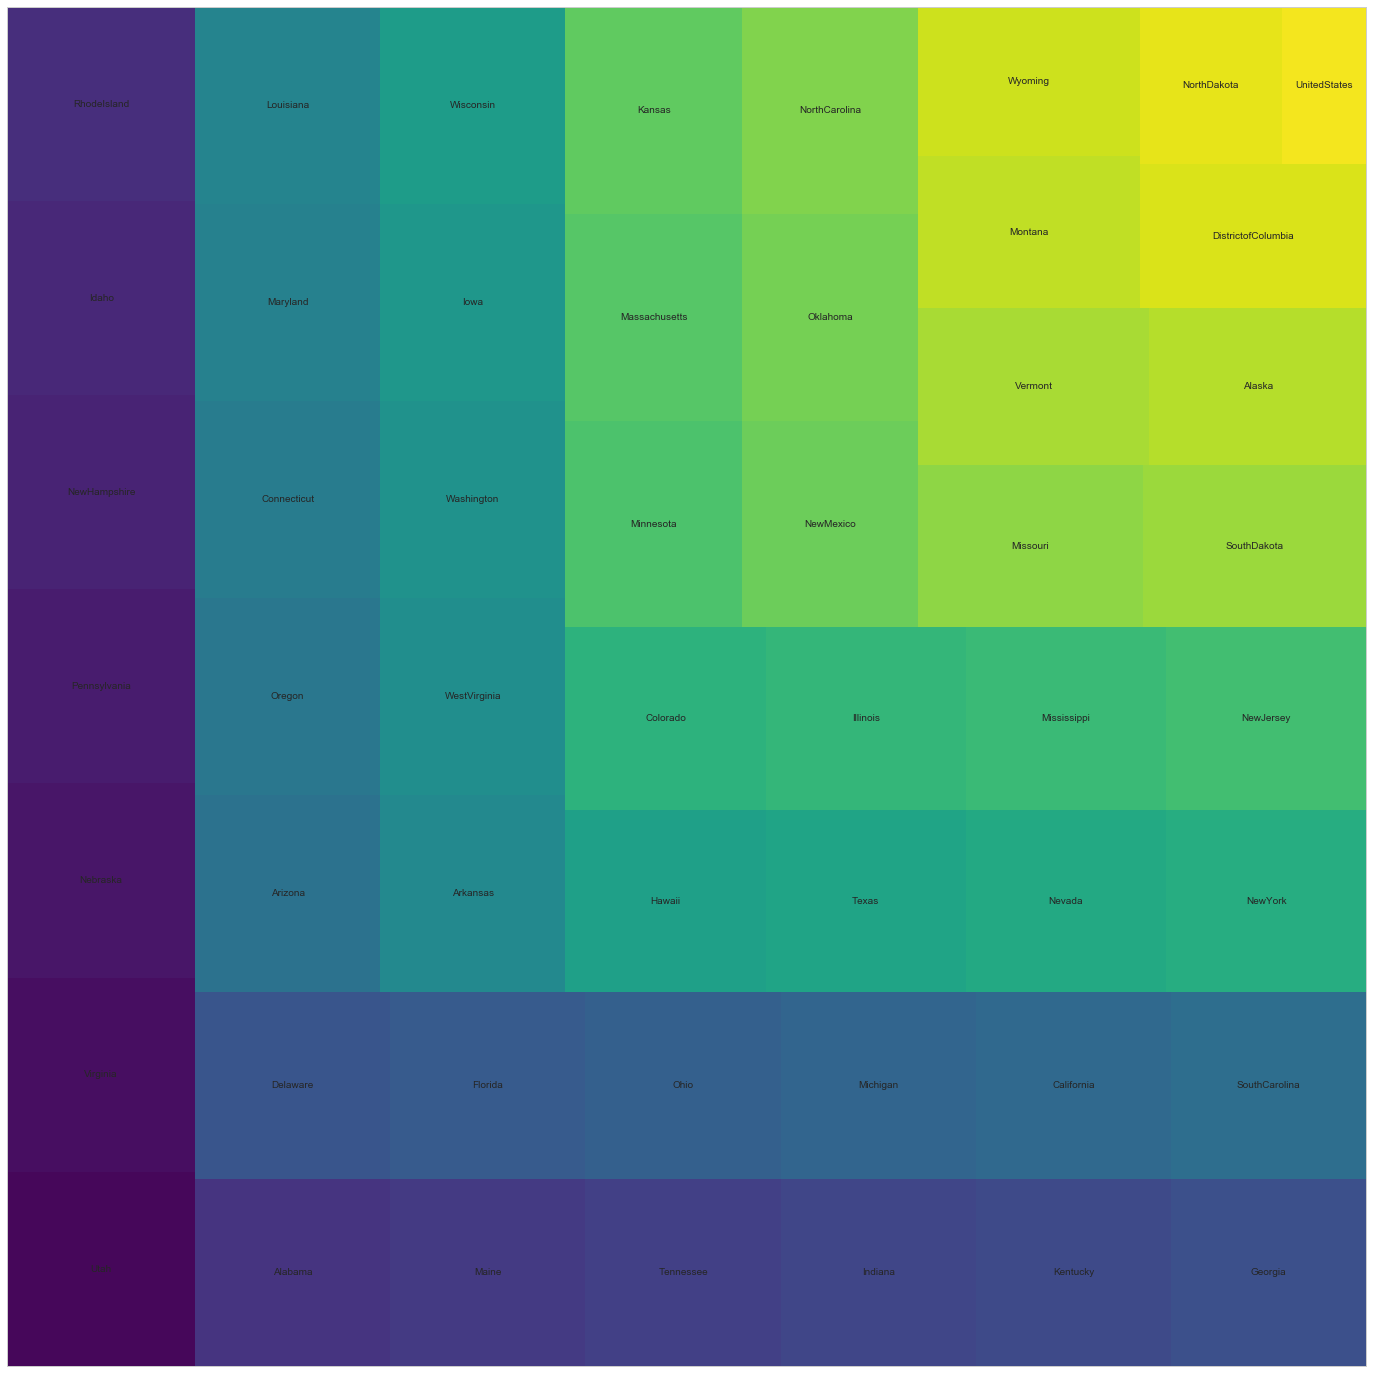

In [6]:
fig = plt.figure(figsize=(20, 20))
regions=State_time_series.RegionName.value_counts().to_frame()
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(sizes=regions['RegionName'].values,label=regions.index,
              color=sns.color_palette('viridis', 52), alpha=1)
ax.set_xticks([])
ax.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(40,25)
plt.show();

### ZVHI values for Top , middle and Bottom Tiers

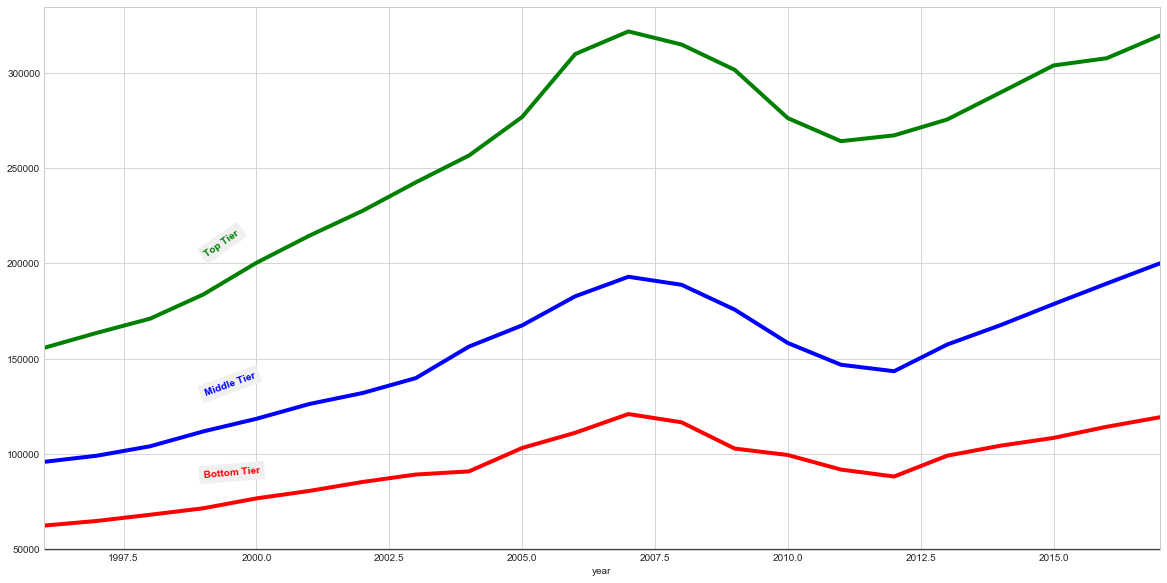

In [7]:
plt.figure(figsize=(20,10));

State_time_series.groupby(State_time_series['year'])['ZHVI_TopTier'].median().plot(linewidth=4,c='g')
State_time_series.groupby(State_time_series['year'])['ZHVI_MiddleTier'].median().plot(linewidth=4,c='b')
State_time_series.groupby(State_time_series['year'])['ZHVI_BottomTier'].median().plot(linewidth=4,c='r')

plt.axhline(y = 50000, color = 'black', linewidth = 1.3, alpha = .7)
plt.xlim(left = 1996, right = 2017)

plt.text(x = 1999, y = 215000, s = 'Top Tier', color = 'g', weight = 'bold', rotation = 35,
              backgroundcolor = '#f0f0f0')
plt.text(x = 1999, y = 140000, s = 'Middle Tier', color = 'b', weight = 'bold', rotation = 20,
              backgroundcolor = '#f0f0f0')
plt.text(x = 1999, y = 90000, s = 'Bottom Tier', color = 'r', weight = 'bold', rotation = 5,
              backgroundcolor = '#f0f0f0');


### House Sale Value Decreases as listings ages 

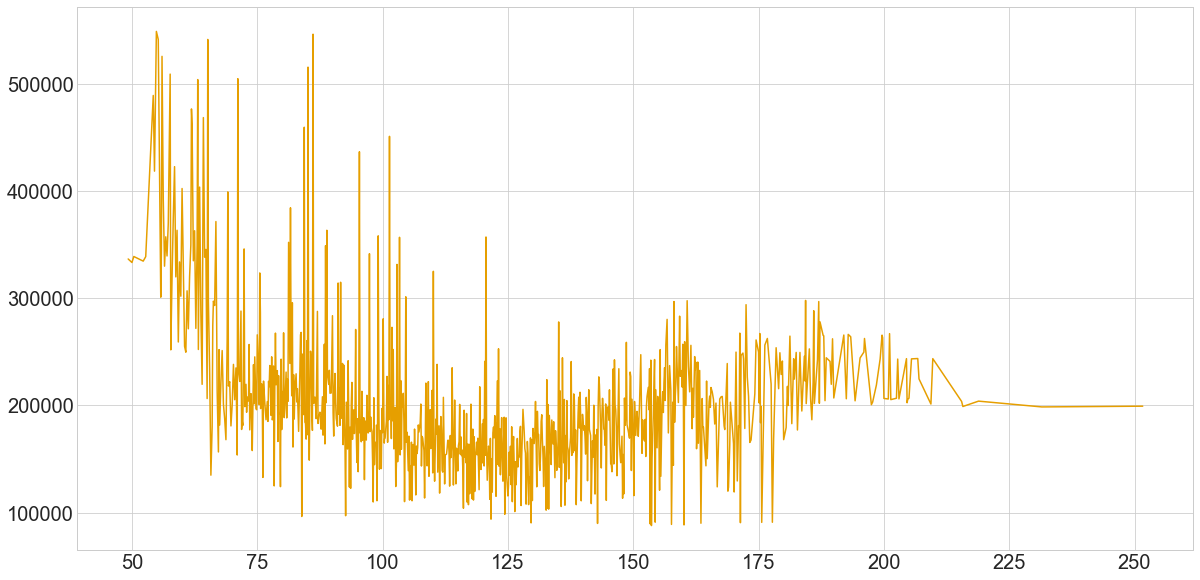

In [8]:
plt.figure(figsize=(20, 10))
mean_group = State_time_series[['DaysOnZillow_AllHomes','ZHVI_AllHomes']].groupby(['DaysOnZillow_AllHomes'])['ZHVI_AllHomes'].mean()
plt.plot(mean_group , color=[230/255,159/255,0])
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)

### Linear Relation between Real Estate Sector Sale Prices

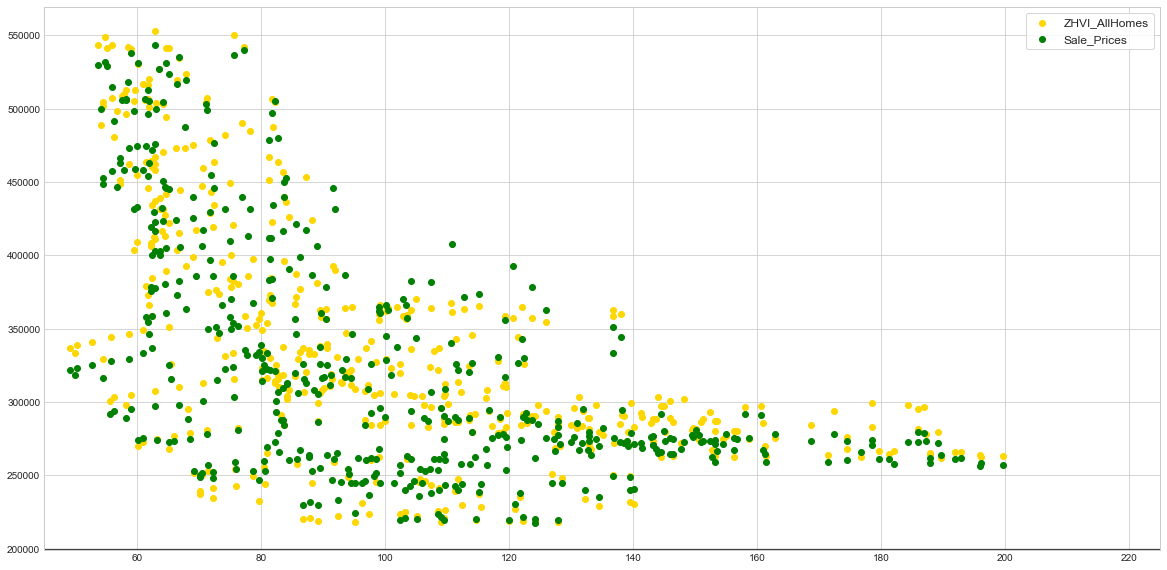

In [9]:
plt.figure(figsize=(20,10));
plt.scatter(State_time_series_year.DaysOnZillow_AllHomes,State_time_series_year.ZHVI_AllHomes,c="gold");
plt.scatter(State_time_series_year.DaysOnZillow_AllHomes,State_time_series_year.Sale_Prices,c="green");
plt.axhline(y = 200000, color = 'black', linewidth = 1.3, alpha = .7)
plt.xlim(left = 45, right = 225)
plt.legend(fontsize=12,loc='best',frameon=1,fancybox=1)

### House Rent Value Decreases as listing ages

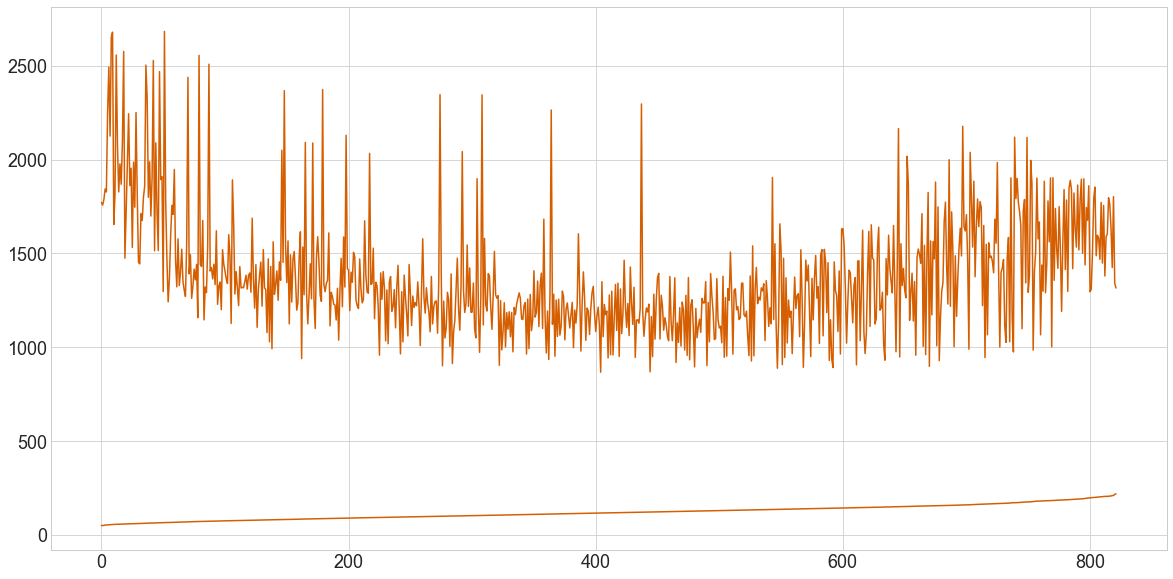

In [10]:
plt.figure(figsize=(20, 10))
mean_group = State_time_series[['DaysOnZillow_AllHomes','ZRI_AllHomes']].groupby(['DaysOnZillow_AllHomes'])['ZRI_AllHomes'].mean().dropna().reset_index(name='ZRI_AllHomes_Mean')
mean_group=mean_group[(mean_group.DaysOnZillow_AllHomes < 250)]
mean_group=mean_group[(mean_group.ZRI_AllHomes_Mean > 500)]
plt.plot(mean_group , color=[213/255,94/255,0])
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)

### Linear Relation between Real Estate Sector Rental Prices

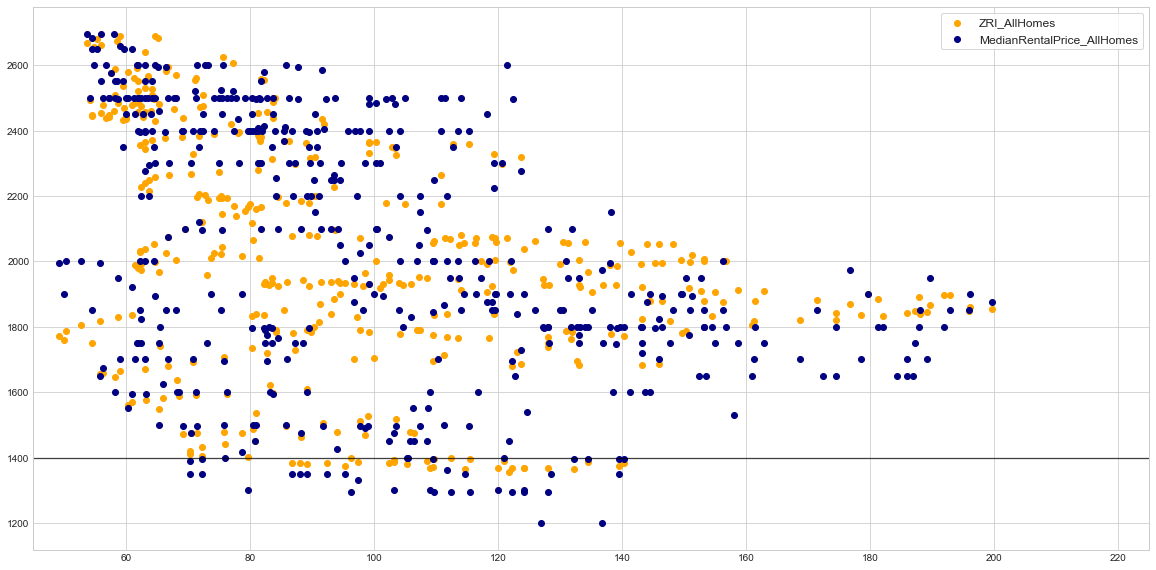

In [11]:
plt.figure(figsize=(20,10));
plt.scatter(State_time_series_year.DaysOnZillow_AllHomes,State_time_series_year.ZRI_AllHomes,c="orange")
plt.scatter(State_time_series_year.DaysOnZillow_AllHomes,State_time_series_year.MedianRentalPrice_AllHomes,c="navy");
plt.axhline(y = 1400, color = 'black', linewidth = 1.3, alpha = .7)
plt.xlim(left = 45, right = 225)
plt.legend(fontsize=12,loc='best',frameon=1,fancybox=1)

### Real Estate Listing Prices Per SquareFoot

(2010, 2017)

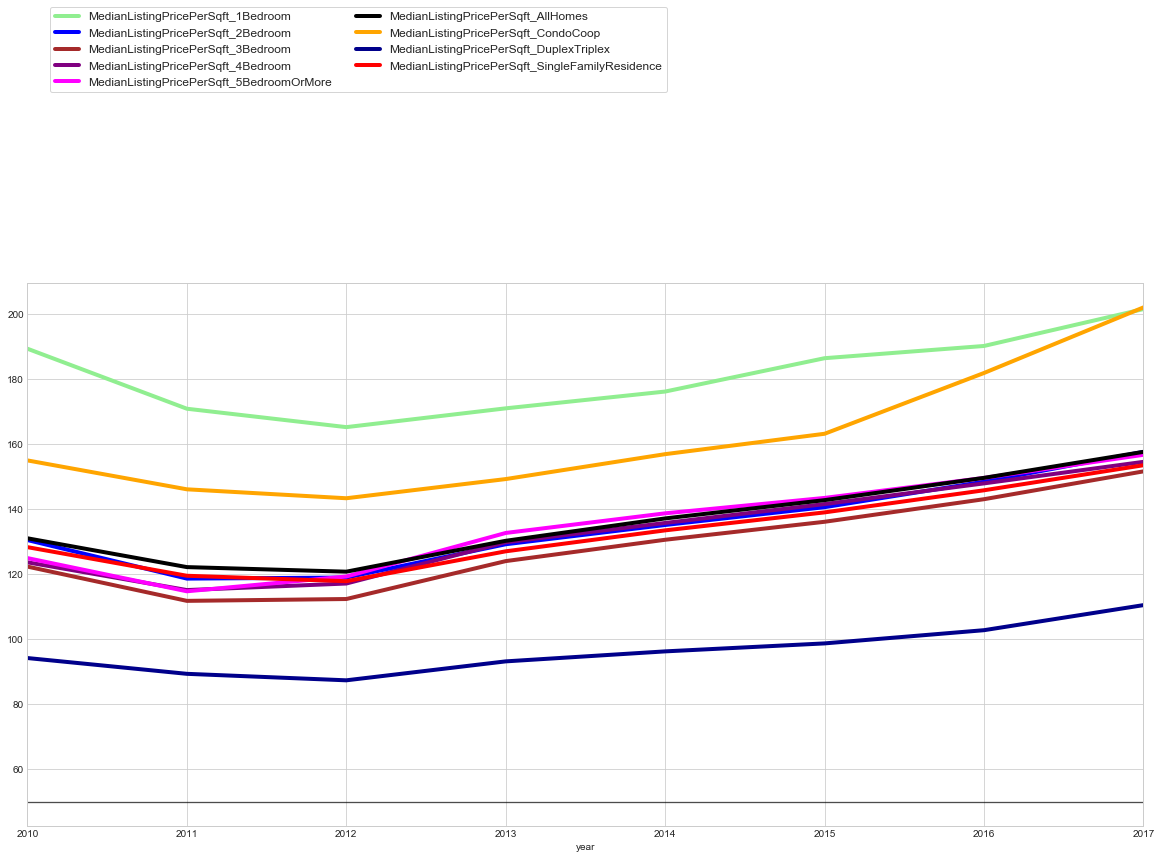

In [12]:
plt.figure(figsize=(20,10));
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_1Bedroom'].mean().dropna().plot(linewidth=4,c='lightgreen', legend=False)
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_2Bedroom'].mean().dropna().plot(linewidth=4,c='b')
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_3Bedroom'].mean().dropna().plot(linewidth=4,c='brown')
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_4Bedroom'].mean().dropna().plot(linewidth=4,c='purple')
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_5BedroomOrMore'].mean().dropna().plot(linewidth=4,c='magenta')
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_AllHomes'].mean().dropna().plot(linewidth=4,c='black')
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_CondoCoop'].mean().dropna().plot(linewidth=4,c='orange',legend=False)
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_DuplexTriplex'].mean().dropna().plot(linewidth=4,c='darkblue',legend=False)
State_time_series.groupby(State_time_series['year'])['MedianListingPricePerSqft_SingleFamilyResidence'].mean().dropna().plot(linewidth=4,c='red')
plt.legend(fontsize=12,loc=(2009,200),frameon=1,fancybox=1,bbox_to_anchor=(0.02,1.35), ncol=2)

plt.axhline(y = 50, color = 'black', linewidth = 1.3, alpha = .7)
plt.xlim(left = 2010, right = 2017)

### Real Estate Properties Decresing Vs Increasing in Values

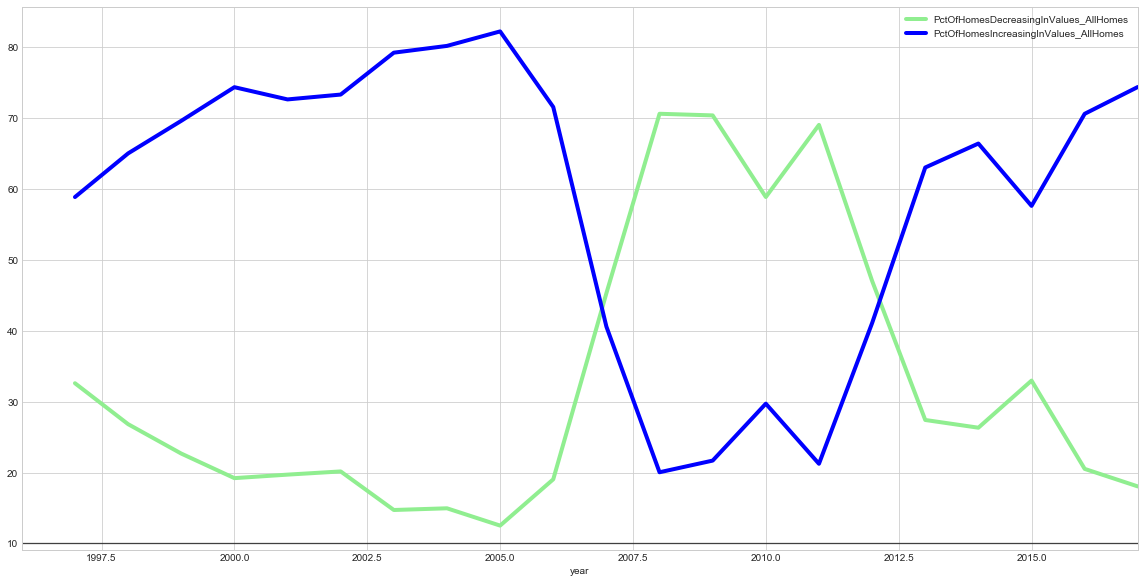

In [13]:
plt.figure(figsize=(20,10));
State_time_series.groupby(State_time_series['year'])['PctOfHomesDecreasingInValues_AllHomes'].median().plot(linewidth=4,c='lightgreen', legend=False)
State_time_series.groupby(State_time_series['year'])['PctOfHomesIncreasingInValues_AllHomes'].median().plot(linewidth=4,c='b')
plt.axhline(y = 10, color = 'black', linewidth = 1.3, alpha = .7)
plt.xlim(left = 1996, right = 2017)
plt.legend()

### Real Estate Properties Salling For Gain and Loss

(2001, 2017)

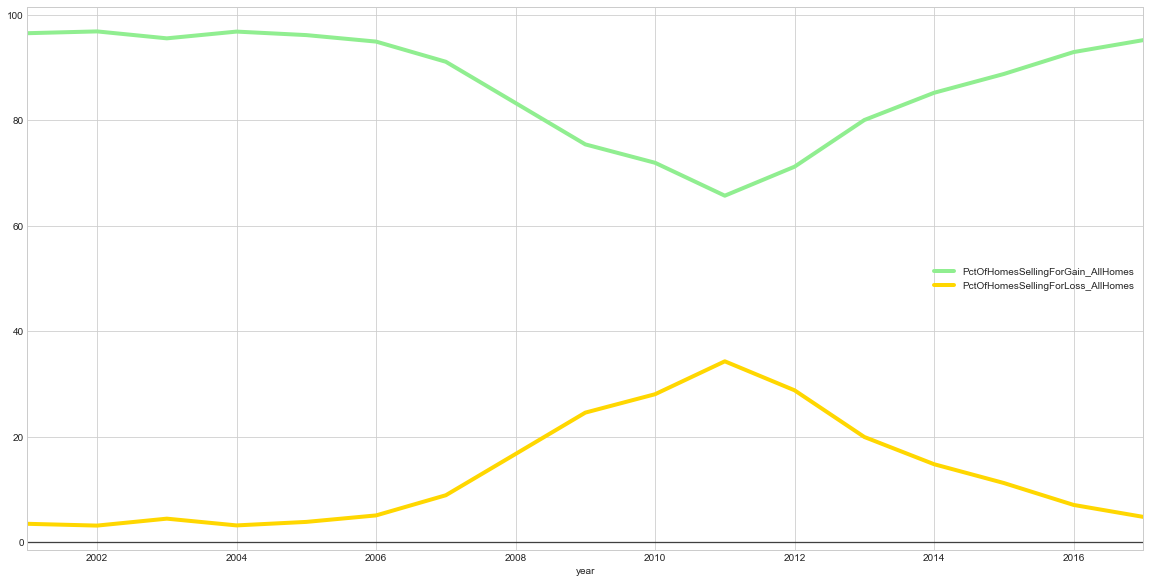

In [14]:
plt.figure(figsize=(20,10));
State_time_series.groupby(State_time_series['year'])['PctOfHomesSellingForGain_AllHomes'].median().plot(linewidth=4,c='lightgreen', legend=False)
State_time_series.groupby(State_time_series['year'])['PctOfHomesSellingForLoss_AllHomes'].median().plot(linewidth=4,c='gold')
plt.legend()
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
plt.xlim(left = 2001, right = 2017)

### Recorded Dates

D:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


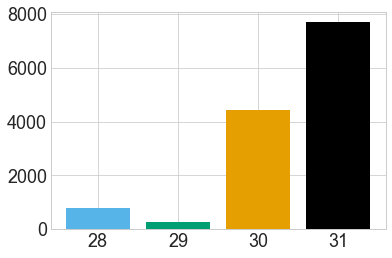

In [15]:
plt.figure().gca().xaxis.set_major_locator(MaxNLocator(integer=True))
State_time_series.day=State_time_series.Date.dt.day
plt.bar(State_time_series.day.value_counts().index,State_time_series.day.value_counts().values,color=colors);
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)

### Real Estate Properties With Price Reductions

(2009, 2017)

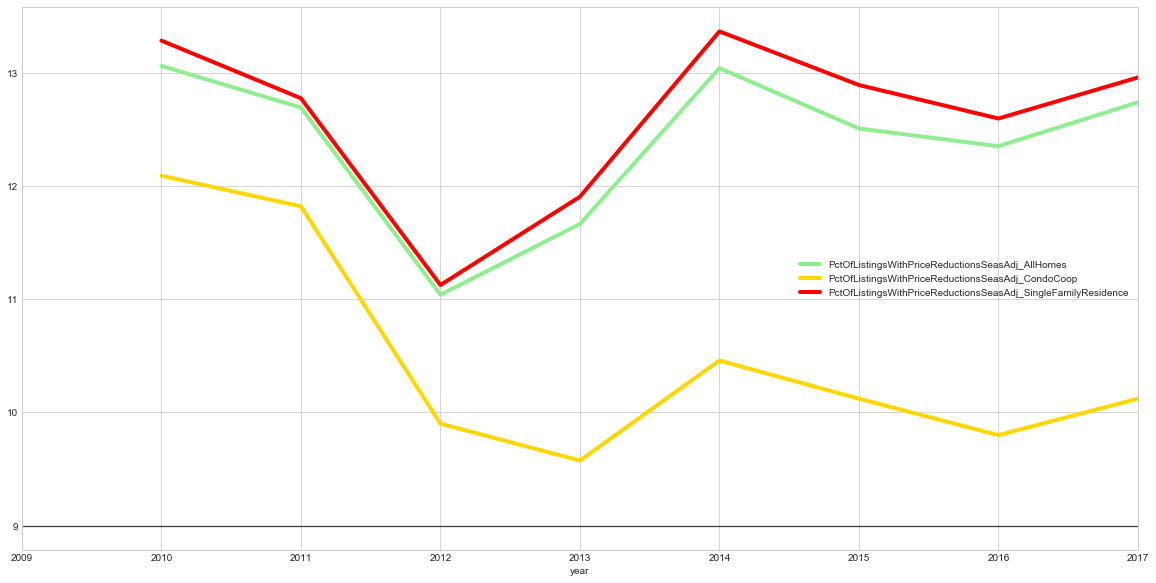

In [16]:
plt.figure(figsize=(20,10));
State_time_series.groupby(State_time_series['year'])['PctOfListingsWithPriceReductionsSeasAdj_AllHomes'].median().plot(linewidth=4,c='lightgreen', legend=False)
State_time_series.groupby(State_time_series['year'])['PctOfListingsWithPriceReductionsSeasAdj_CondoCoop'].median().plot(linewidth=4,c='gold')
State_time_series.groupby(State_time_series['year'])['PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence'].median().plot(linewidth=4,c='red')
plt.legend(loc='center right')
plt.axhline(y = 9, color = 'black', linewidth = 1.3, alpha = .7)
plt.xlim(left = 2009, right = 2017)

### Real Estate Rental Prices Per SquareFoot

(2010, 2017)

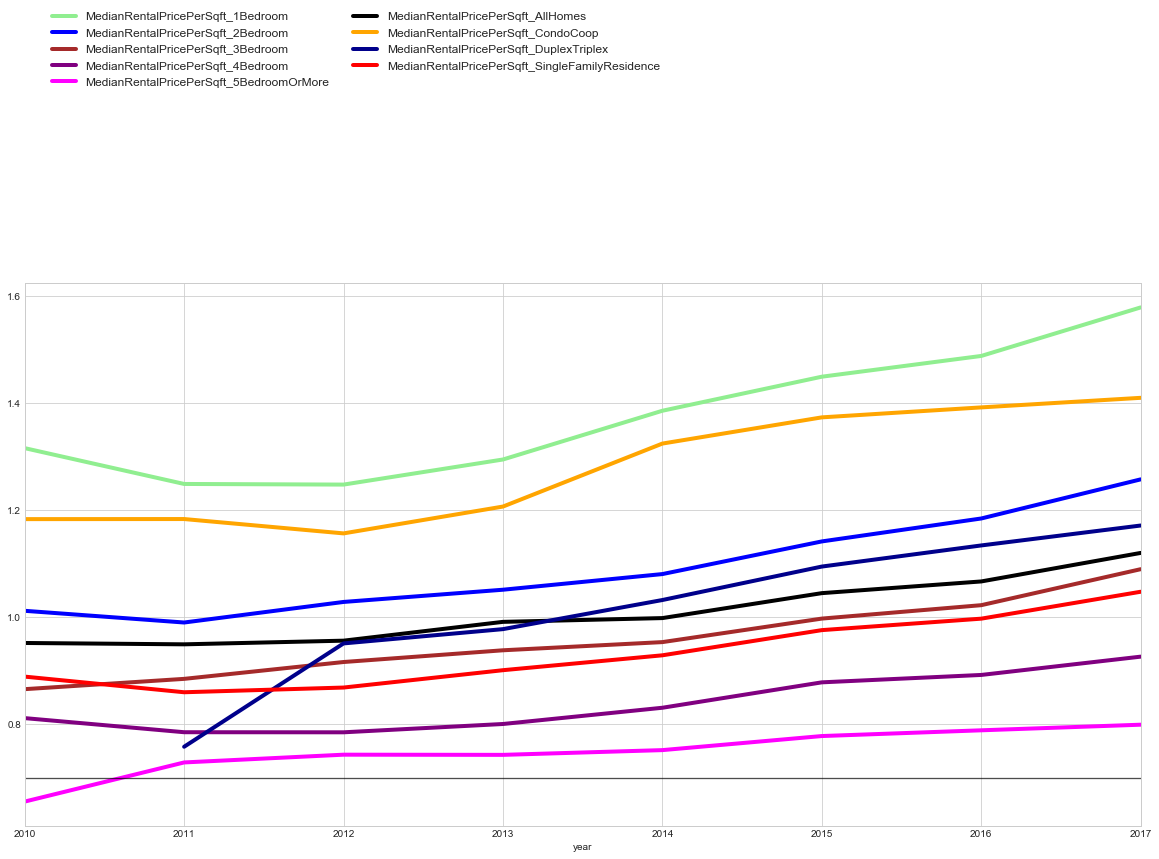

In [17]:
plt.figure(figsize=(20,10));
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_1Bedroom'].mean().dropna().plot(linewidth=4,c='lightgreen', legend=False)
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_2Bedroom'].mean().dropna().plot(linewidth=4,c='b')
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_3Bedroom'].mean().dropna().plot(linewidth=4,c='brown')
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_4Bedroom'].mean().dropna().plot(linewidth=4,c='purple')
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_5BedroomOrMore'].mean().dropna().plot(linewidth=4,c='magenta')
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_AllHomes'].mean().dropna().plot(linewidth=4,c='black')
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_CondoCoop'].mean().dropna().plot(linewidth=4,c='orange',legend=False)
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_DuplexTriplex'].mean().dropna().plot(linewidth=4,c='darkblue',legend=False)
State_time_series.groupby(State_time_series['year'])['MedianRentalPricePerSqft_SingleFamilyResidence'].mean().dropna().plot(linewidth=4,c='red')
plt.legend(fontsize=12,loc=(2010,1.65),bbox_to_anchor=(0.02,1.35), ncol=2)

plt.axhline(y = 0.7, color = 'black', linewidth = 1.3, alpha = .7)
plt.xlim(left = 2010, right = 2017)

### Increase in House SalePrice for Top US states as shown by Time Frequency

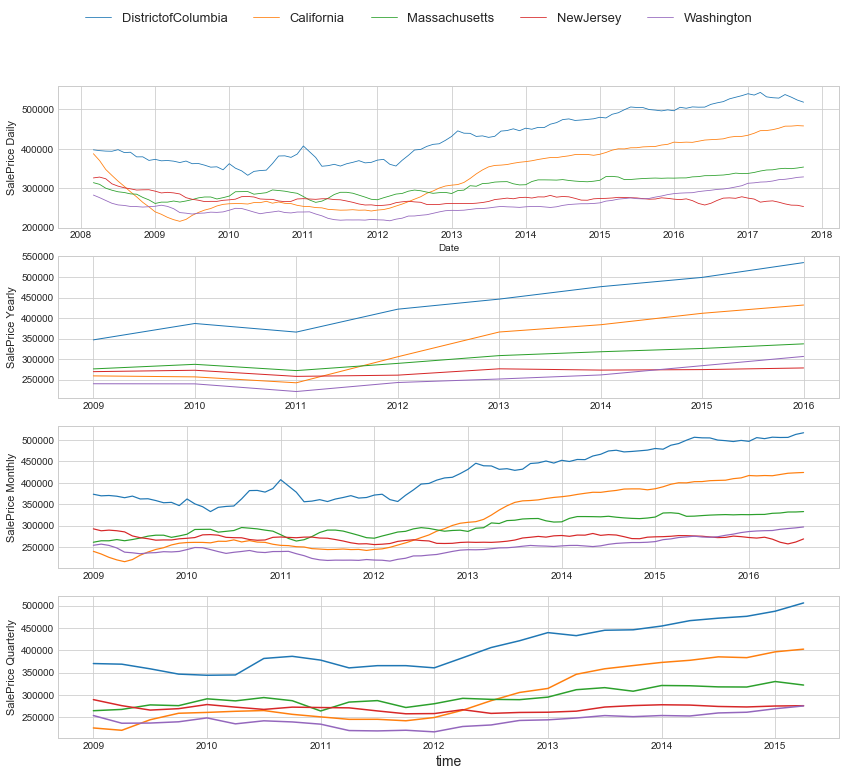

In [18]:
States_year_SalePrices=State_time_series_year.groupby([State_time_series_year.Date,State_time_series_year.RegionName])['Sale_Prices'].mean().dropna().reset_index(name='Sale_Prices')
PriceDF=States_year_SalePrices.pivot(index='Date', columns='RegionName', values='Sale_Prices').dropna()#.plot(figsize=(15,8))#, color=colors, legend=False)

t0 = PriceDF.index
t1 = pd.date_range(pd.to_datetime('30/01/2009'),pd.to_datetime('2017-08-31'),freq='A')
t2 = pd.date_range(pd.to_datetime('30/01/2009',dayfirst=True),pd.to_datetime('2016-08-31' ,dayfirst=True),freq='M')
t3 = pd.date_range(pd.to_datetime('30/01/2009',dayfirst=True),pd.to_datetime('2015-08-31',dayfirst=True),freq='Q')

fig, ax = plt.subplots(nrows=4,ncols=1,figsize=(14,12))
PriceDF.reindex(index=t0,columns=highest_cost_states).plot(ax=ax[0], lw=0.8, legend=False);
ax[0].set_ylabel('SalePrice Daily', fontsize=11)
PriceDF.reindex(index=t1,columns=highest_cost_states).plot(ax=ax[1], lw=1.0, legend=False);
ax[1].set_ylabel('SalePrice Yearly', fontsize=11)

PriceDF.reindex(index=t2,columns=highest_cost_states).plot(ax=ax[2], lw=1.2, legend=False); 
ax[2].set_ylabel('SalePrice Monthly', fontsize=11)

PriceDF.reindex(index=t3,columns=highest_cost_states).plot(ax=ax[3], lw=1.5, legend=False);
ax[3].set_ylabel('SalePrice Quarterly', fontsize=11)


ax[0].legend(loc='lower left',fontsize=13, bbox_to_anchor=(0.02,1.35), ncol=len(highest_cost_states));
ax[3].set_xlabel('time', fontsize=14);

## Prediction with Facebook Prophet library

In [19]:
StateDF=State_time_series_year[['Date','ZHVI_AllHomes']]
StateDF.dropna(inplace=True)
StateDF['ds']=StateDF['Date']
StateDF['y']=np.log(StateDF['ZHVI_AllHomes'])

D:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

In [20]:
del StateDF['Date']
del StateDF['ZHVI_AllHomes']

In [21]:
train=StateDF[:len(StateDF)-40]
train.shape

(1227, 2)

In [22]:
test=StateDF[len(StateDF)-40:]
test.shape

(40, 2)

In [23]:
m = Prophet()
m.fit(StateDF);

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
future = m.make_future_dataframe(periods=40) # days for test split

In [25]:
forecast = m.predict(future)

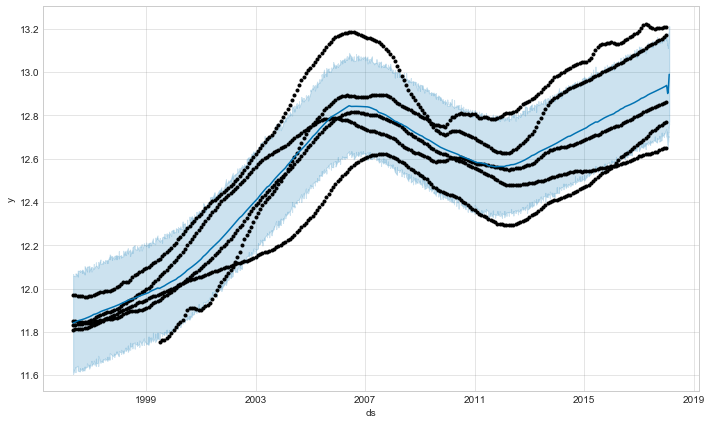

In [26]:
m.plot(forecast);

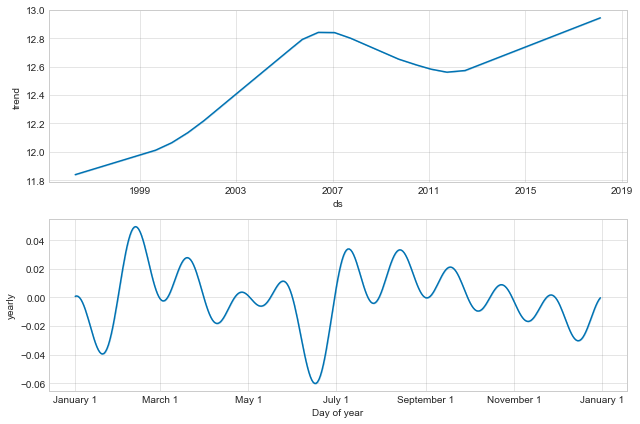

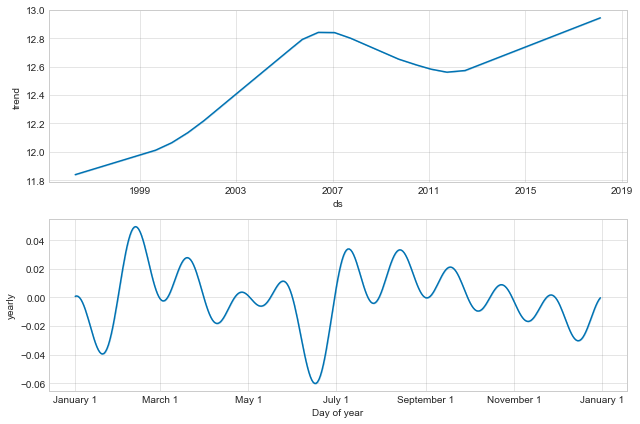

In [27]:
m.plot_components(forecast)